<a href="https://colab.research.google.com/github/Rupasri20055/Exploratory-Data-Analysis-EDA-/blob/main/Task_2_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries & Load Dataset**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("AmesHousing.csv")


 **Check Dataset Shape, Info & Column Names**

In [9]:
print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nColumn names:")
print(df.columns.tolist())


Dataset shape: (2930, 82)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        29

** Summary Statistics**

In [8]:
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.24536

**Histograms for Numeric Columns**

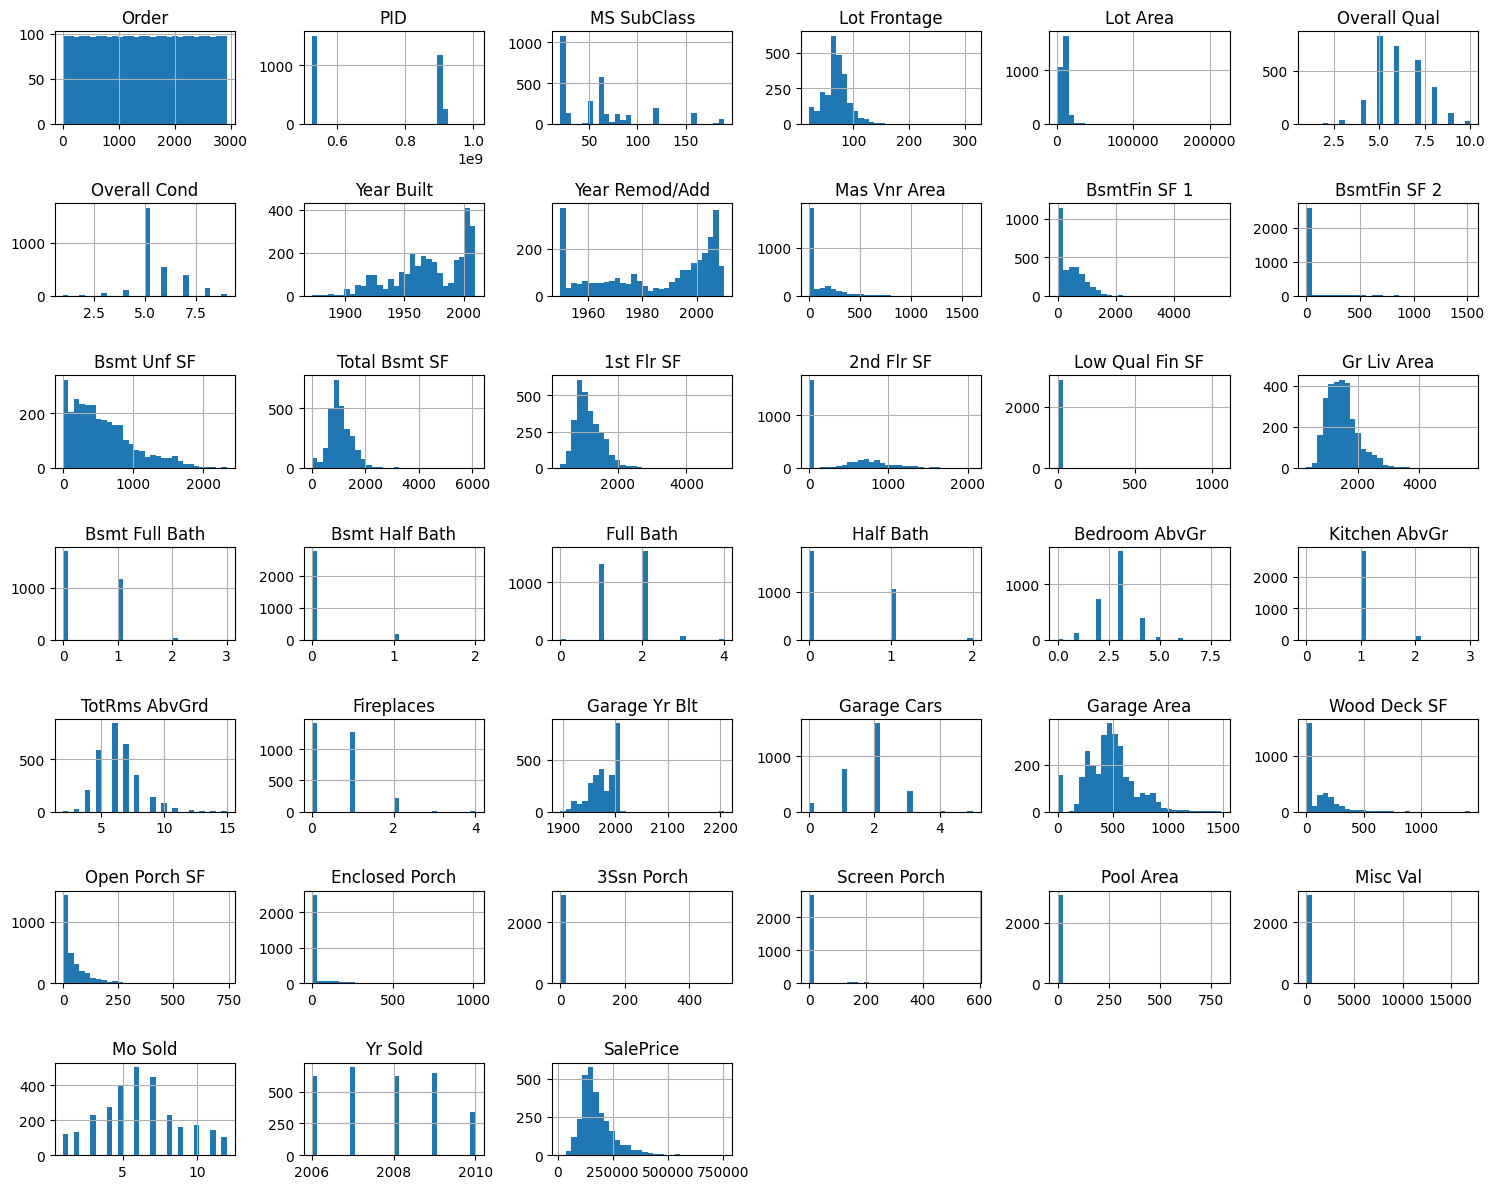

In [10]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()


**Boxplots for SalePrice and Gr Liv Area**

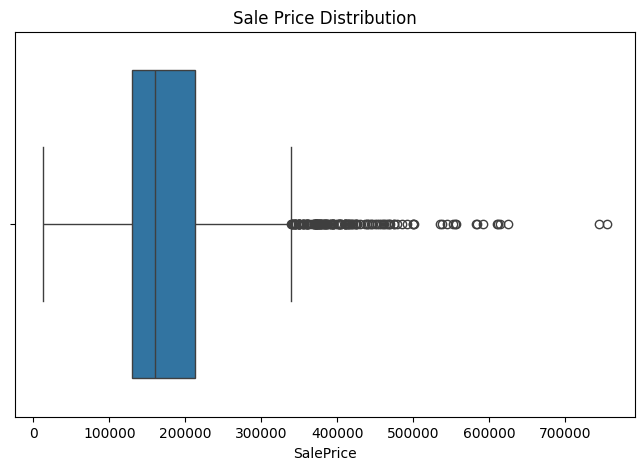

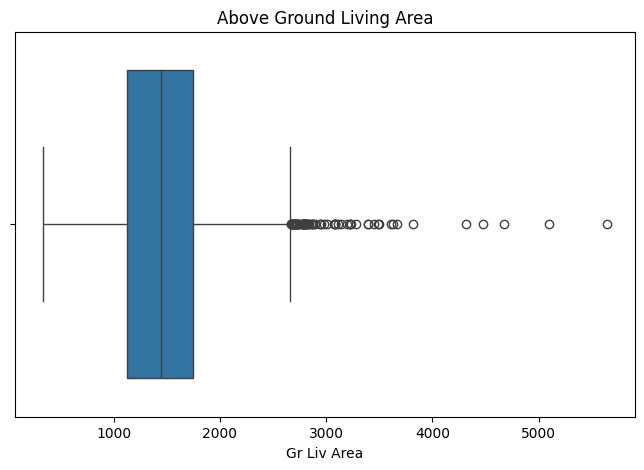

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['SalePrice'])
plt.title('Sale Price Distribution')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Gr Liv Area'])
plt.title('Above Ground Living Area')
plt.show()


**Correlation Matrix Heatmap**

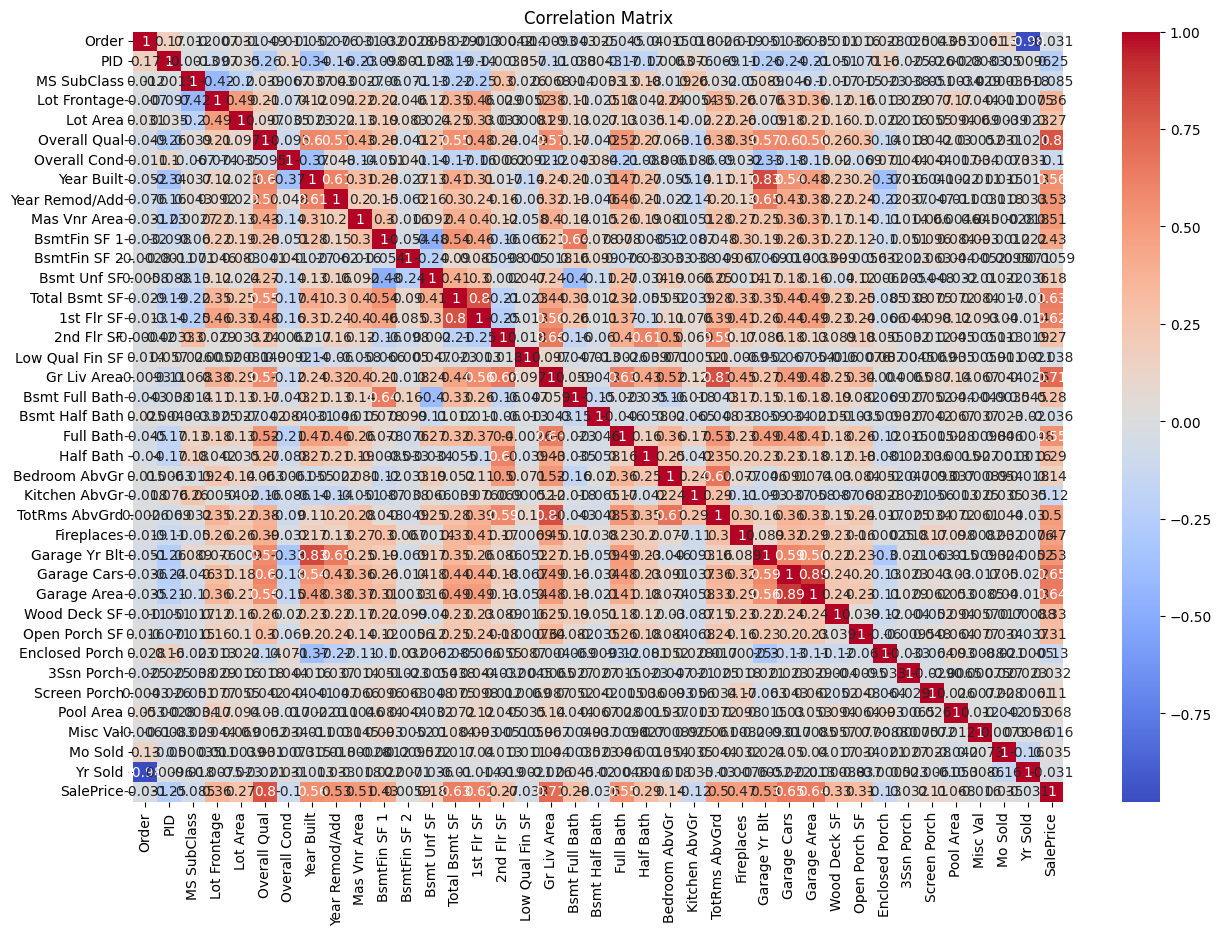

In [12]:
plt.figure(figsize=(15, 10))
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


**Pairplot for Top Correlated Features**

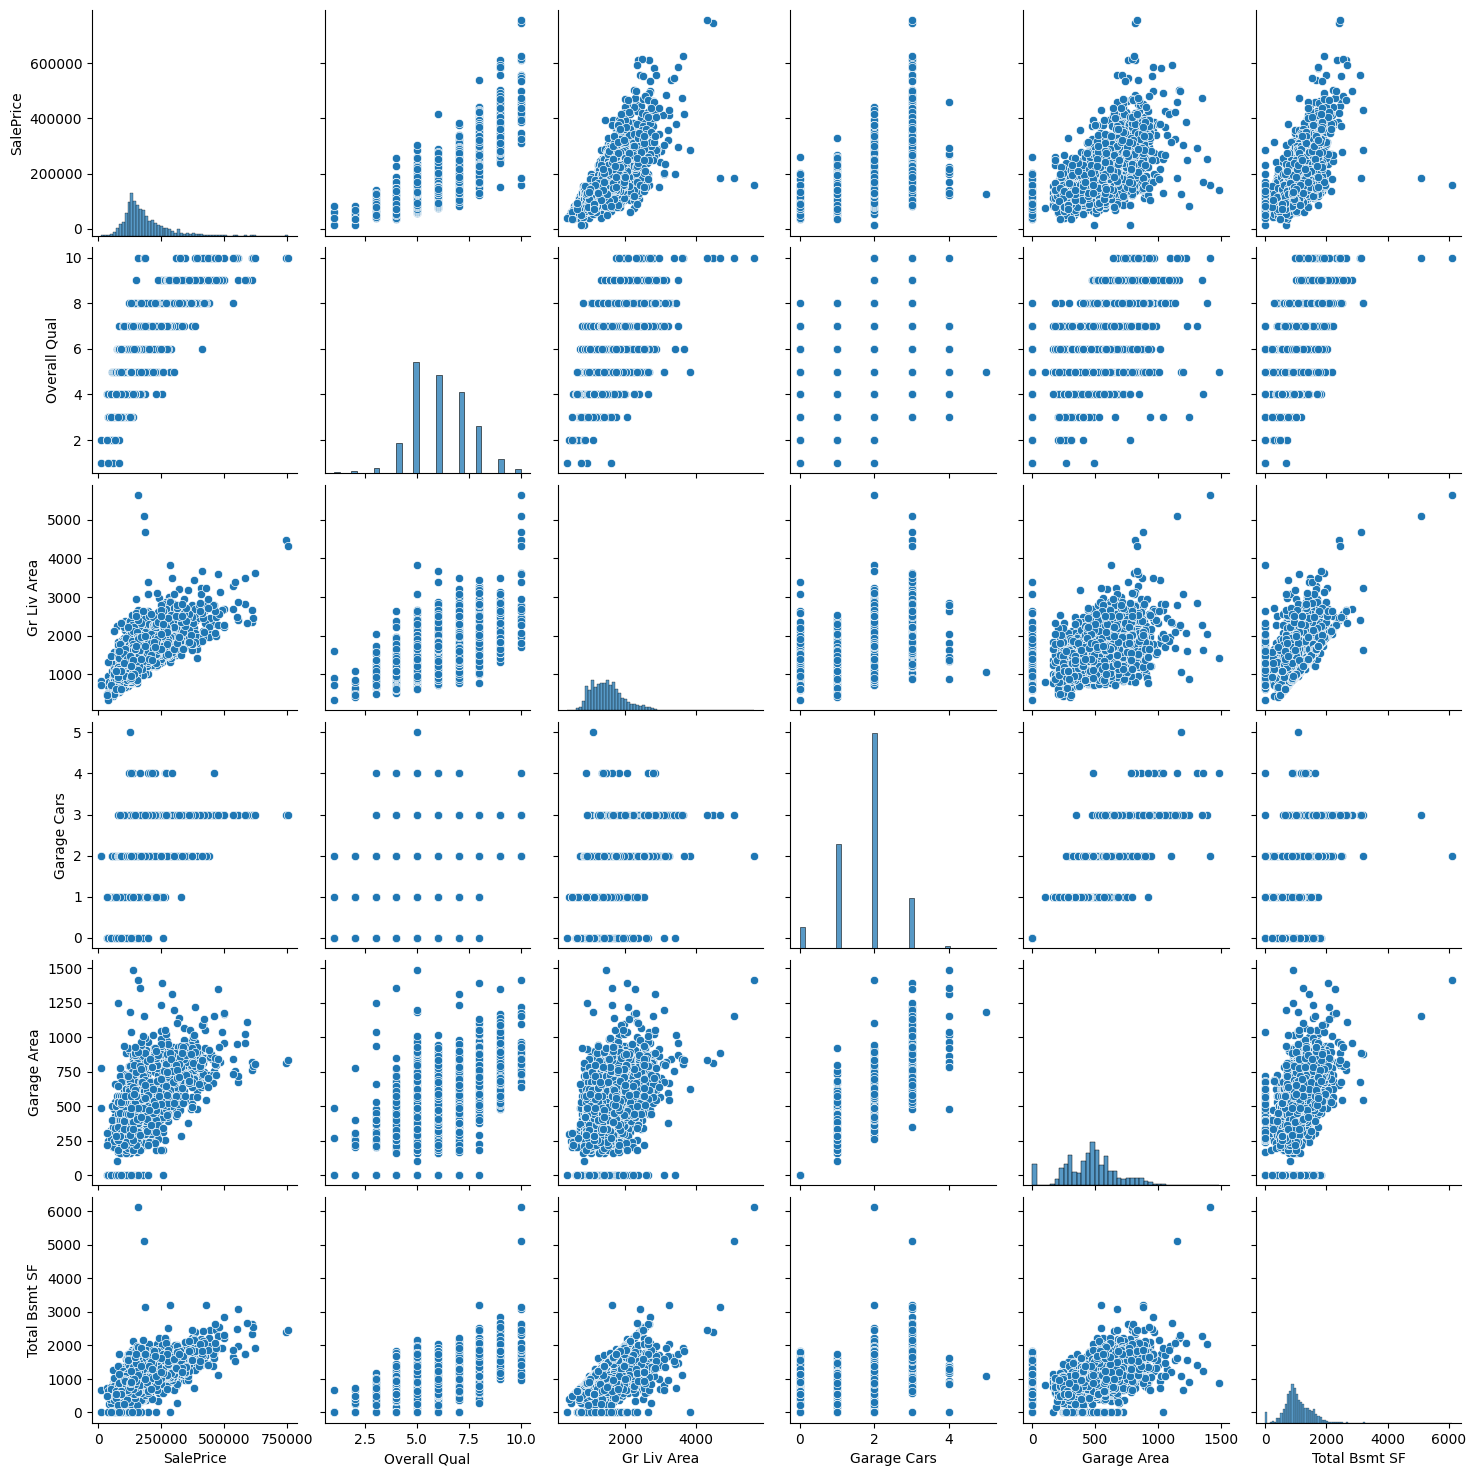

In [13]:
if 'SalePrice' in numeric_df.columns:
    top_corr_features = corr['SalePrice'].sort_values(ascending=False).head(6).index
    sns.pairplot(numeric_df[top_corr_features])
    plt.show()
else:
    print("SalePrice is not a numeric column, cannot create pairplot.")


**Scatterplot: SalePrice vs Gr Liv Area**

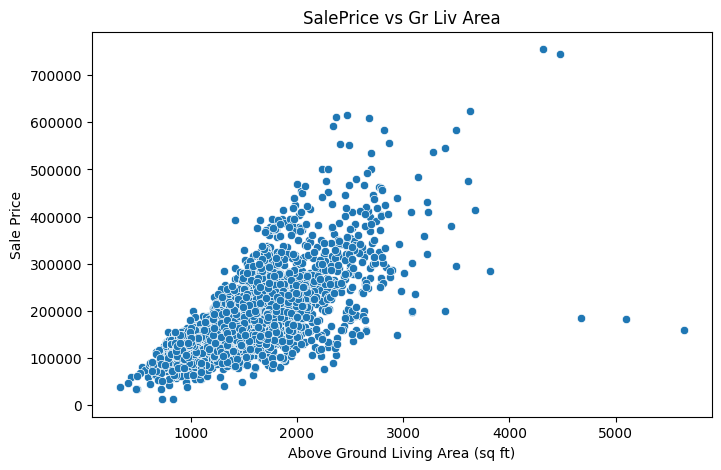

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Gr Liv Area'], y=df['SalePrice'])
plt.title('SalePrice vs Gr Liv Area')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()


**Distribution Plot for SalePrice**

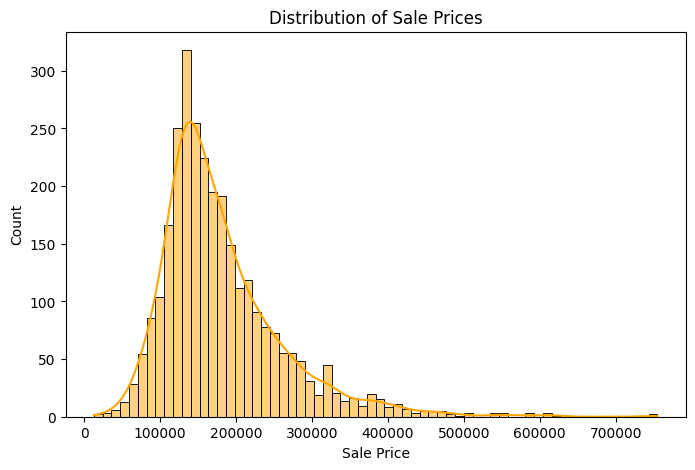

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True, color='orange')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.show()


** Countplot & Violin Plot for Overall Quality**

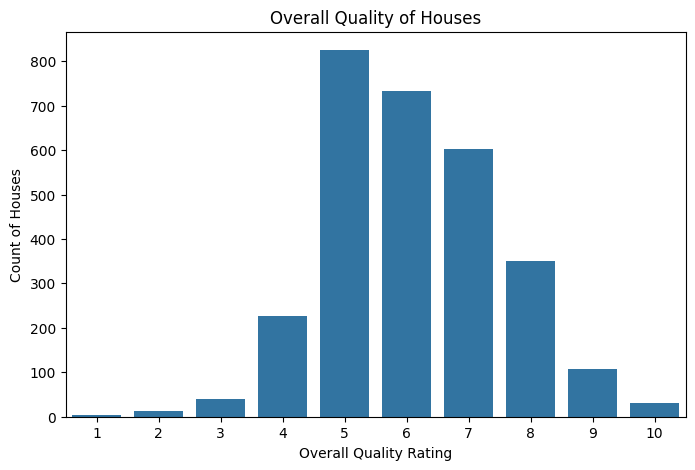

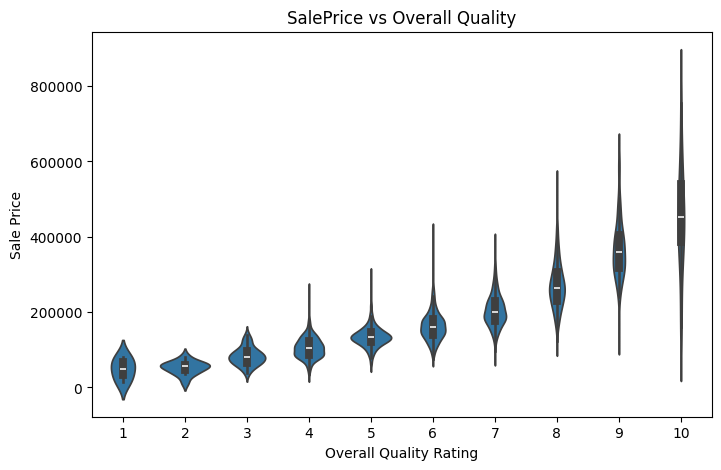

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Overall Qual'])
plt.title('Overall Quality of Houses')
plt.xlabel('Overall Quality Rating')
plt.ylabel('Count of Houses')
plt.show()

plt.figure(figsize=(8,5))
sns.violinplot(x=df['Overall Qual'], y=df['SalePrice'])
plt.title('SalePrice vs Overall Quality')
plt.xlabel('Overall Quality Rating')
plt.ylabel('Sale Price')
plt.show()
